In [11]:
#모듈import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

In [12]:
df=pd.read_csv('InsuranceData.csv')
df

,Unnamed: 0,SIU_CUST_YN,SEX,AGE,FP_CAREER,OCCP_GRP,TOTALPREM,MAIN_INSR_AMT_SUM,WORK_YEARS_MIN,EXPR_COUNT,DMND_AMT_SUM,CLAIM_CNT,TOTAL_VLID_HOSP_OTDA,HOSP_VARIES,HOSP_DVSN_VARIES,CHME_LICE_COUNT
0,0,N,2,4,N,1,14,120266433,0,8,141450,4,5,2,2,1
1,1,N,1,6,N,11,2,5000000,1,1,1390000,3,6,3,2,3
2,2,N,1,5,Y,2,15,1797991770,1,24,2480000,10,21,4,3,4
3,3,N,1,5,N,17,13,212274240,1,6,72320,1,5,1,1,1
4,4,N,1,5,N,1,3,75256800,13,4,1300000,4,26,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7621,7621,N,2,4,N,3,0,120000000,0,3,519989,5,13,2,2,2
7622,7622,N,2,5,N,2,22,981195605,6,15,100000,1,0,1,1,1
7623,7623,N,2,5,N,8,0,50000000,5,1,73300,1,2,1,1,1
7624,7624,N,2,4,N,3,0,65000000,2,2,1081494,1,3,1,1,1


In [13]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [14]:
df['SIU_CUST_YN'].replace('N', 0, inplace = True)
df['SIU_CUST_YN'].replace('Y', 1, inplace = True)
df['FP_CAREER'].replace('N', 0, inplace = True)
df['FP_CAREER'].replace('Y', 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7626 entries, 0 to 7625
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   SIU_CUST_YN           7626 non-null   int64
 1   SEX                   7626 non-null   int64
 2   AGE                   7626 non-null   int64
 3   FP_CAREER             7626 non-null   int64
 4   OCCP_GRP              7626 non-null   int64
 5   TOTALPREM             7626 non-null   int64
 6   MAIN_INSR_AMT_SUM     7626 non-null   int64
 7   WORK_YEARS_MIN        7626 non-null   int64
 8   EXPR_COUNT            7626 non-null   int64
 9   DMND_AMT_SUM          7626 non-null   int64
 10  CLAIM_CNT             7626 non-null   int64
 11  TOTAL_VLID_HOSP_OTDA  7626 non-null   int64
 12  HOSP_VARIES           7626 non-null   int64
 13  HOSP_DVSN_VARIES      7626 non-null   int64
 14  CHME_LICE_COUNT       7626 non-null   int64
dtypes: int64(15)
memory usage: 893.8 KB


In [16]:
#특성 변수 분류
X= df.iloc[:,1:]
y= df.iloc[:,0]

#train과 test데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5338, 14) (2288, 14) (5338,) (2288,)


In [17]:
#smote를 활용한 데이터 불균형 처리
SMOTE=SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [18]:
model = LogisticRegression()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

ROC AUC score for oversampled SMOTE data:  0.5919270487080619


In [19]:

print('accuracy: %.2f' % accuracy_score(y_test, pred_SMOTE))
print('precision: %.2f' % precision_score(y_test, pred_SMOTE))
print('recall: %.2f' % recall_score(y_test, pred_SMOTE))
print('F1: %.2f' % f1_score(y_test, pred_SMOTE))

accuracy: 0.32
precision: 0.12
recall: 0.92
F1: 0.21


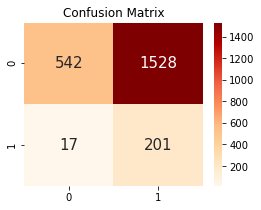

In [20]:
confusion = confusion_matrix(y_true = y_test, y_pred = pred_SMOTE)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()